In [ ]:
# =============================
# ANALYSIS: Sales Data
# =============================

#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Step 1: Load Dataset
data = pd.read_csv("data/daily_sales_data_0.csv")  # replace with your actual CSV path
data.head()


,product,price,quantity,date,region
0,pink morsel,$3.00,546,2018-02-06,north
1,pink morsel,$3.00,549,2018-02-06,south
2,pink morsel,$3.00,577,2018-02-06,east
3,pink morsel,$3.00,519,2018-02-06,west
4,gold morsel,$9.99,580,2018-02-06,north


In [ ]:
#  Data Cleaning

# Check for missing values
data.isnull().sum()

# Remove $ symbol and convert price to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Check data types
data.dtypes


product      object
price       float64
quantity      int64
date         object
region       object
dtype: object

In [ ]:
#  Total Sales per Month
data['date'] = pd.to_datetime(data['date'])
monthly_sales = data.groupby(data['date'].dt.to_period('M'))['price'].sum()
monthly_sales


date
2018-02    2458.24
2018-03    3313.28
2018-04    3206.40
2018-05    3313.28
2018-06    3206.40
2018-07    3313.28
2018-08    3313.28
2018-09    3206.40
2018-10    3313.28
2018-11    3206.40
2018-12    3313.28
2019-01    3313.28
2019-02    2992.64
2019-03    3313.28
2019-04    3206.40
2019-05    3313.28
2019-06    1068.80
Freq: M, Name: price, dtype: float64

In [ ]:
#  Highest Sales Month
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()
print(f"Highest sales month: {highest_sales_month}, Sales: ${highest_sales_value:,.2f}")


Highest sales month: 2018-03, Sales: $3,313.28


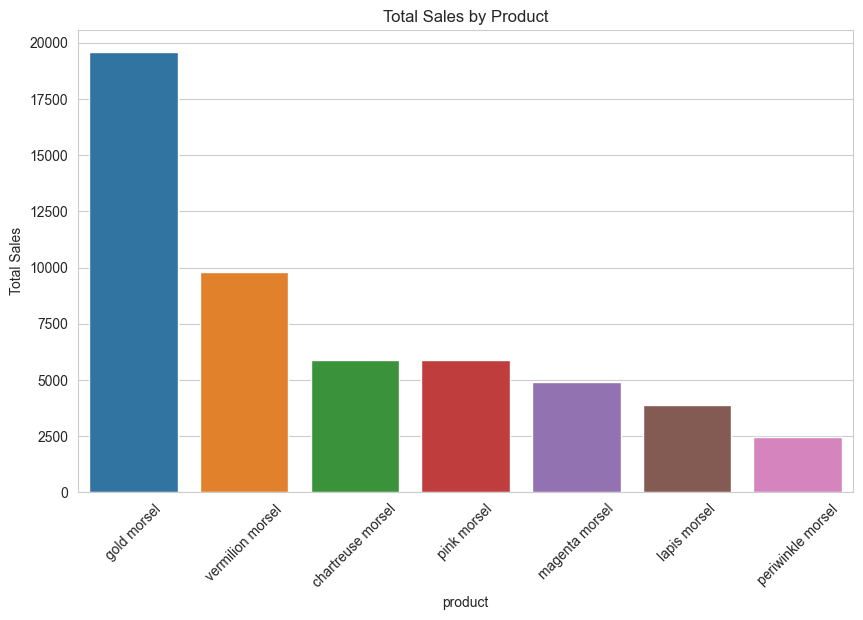

In [ ]:
#  Total Sales per Product
product_sales = data.groupby('product')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Total Sales by Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [37]:
data['total_sales'] = data['price'] * data['quantity']

region
west     7208452.09
north    7198331.02
south    7196224.11
east     7190761.70
Name: total_sales, dtype: float64


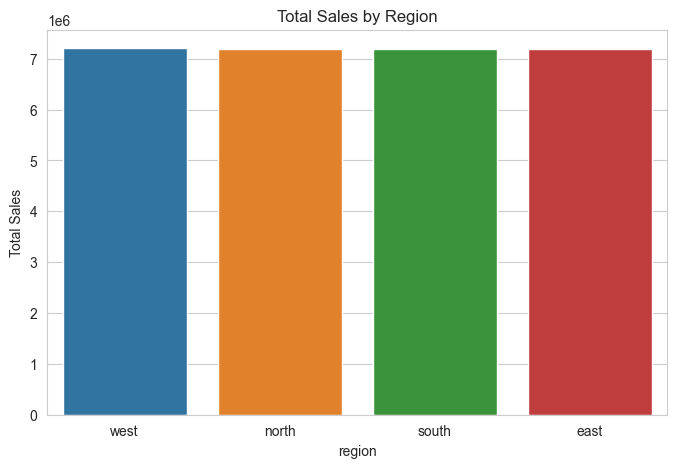

In [ ]:
# Total Sales per Region
region_sales = data.groupby('region')['total_sales'].sum().sort_values(ascending=False)
print(region_sales)
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.show()


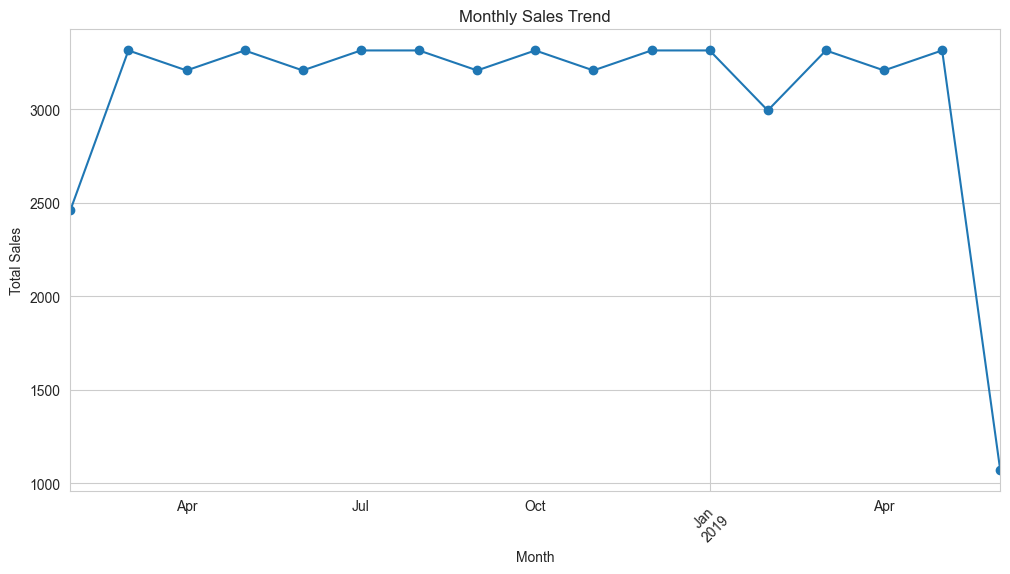

In [ ]:
#  Monthly Sales Trend
monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


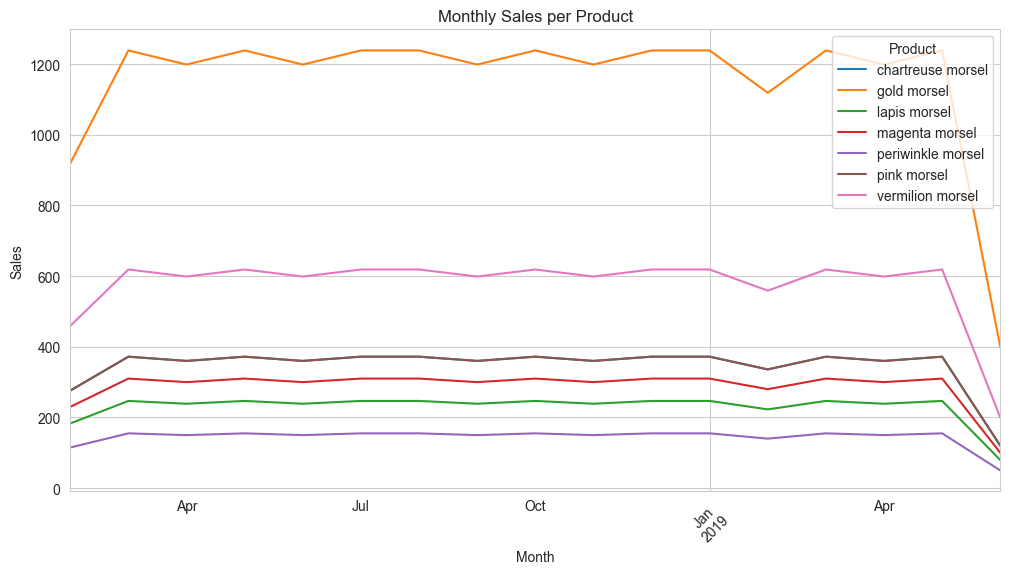

In [ ]:
#  Sales of Products Across Months
product_monthly = data.pivot_table(index=data['date'].dt.to_period('M'),
                                   columns='product',
                                   values='price',
                                   aggfunc='sum')

product_monthly.plot(figsize=(12,6))
plt.title('Monthly Sales per Product')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()


<AxesSubplot:xlabel='date'>

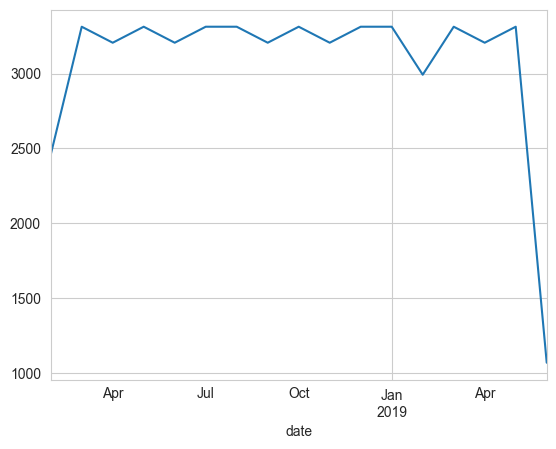

In [40]:
monthly_sales.plot()

# Step 9: Insights & Recommendations

- **Top Product:** The product with the highest sales is `Gold Morsel`.
- **Top Month:** The month with peak sales is `2018-03`.
- **Top Region:** `west` contributes the most to revenue.
- **Trend:** There is a clear seasonal trend; sales peak in March.
- **Action:** Increase inventory for top products in high-sales months. Target marketing campaigns for lower-performing regions.
